
# <span style="color:rgb(213,80,0)">Internet Marketing Data</span>

This file creates Figures 7.20\-7.24

## Beginning of code

[https://www.kaggle.com/fayejavad/marketing\-linear\-multiple\-regression](https://www.kaggle.com/fayejavad/marketing-linear-multiple-regression)


In [1]:
clear
close all
load('Marketing_Data')
y=Marketing_Data{:,4};
X=Marketing_Data{:,1:3};
prin=0;

## Preliminary analysis

Fit regression model based on the original data


In [2]:
out=fitlm(X,y);
% F stat is 504
disp('F stat')

F stat

In [3]:
disp(out.ModelFitVsNullModel.Fstat)

  503.6581

In [4]:
disp('ANOVA table based on untransformed data')

ANOVA table based on untransformed data

In [5]:
disp(out)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate        SE         tStat       pValue  
                   _________    _________    _______    __________
    (Intercept)       3.5059      0.39965     8.7724    1.9566e-15
    x1              0.045235    0.0015164      29.83    8.3079e-69
    x2                0.1884    0.0090163     20.895    1.8308e-48
    x3             0.0042795    0.0065014    0.65824       0.51129
Number of observations: 171, Error degrees of freedom: 167
Root Mean Squared Error: 2.01
R-squared: 0.9,  Adjusted R-Squared: 0.899
F-statistic vs. constant model: 504, p-value = 2.09e-83

## Create Figure 7.20

all options set to false. Monotonicity of the expl. variables imposed.



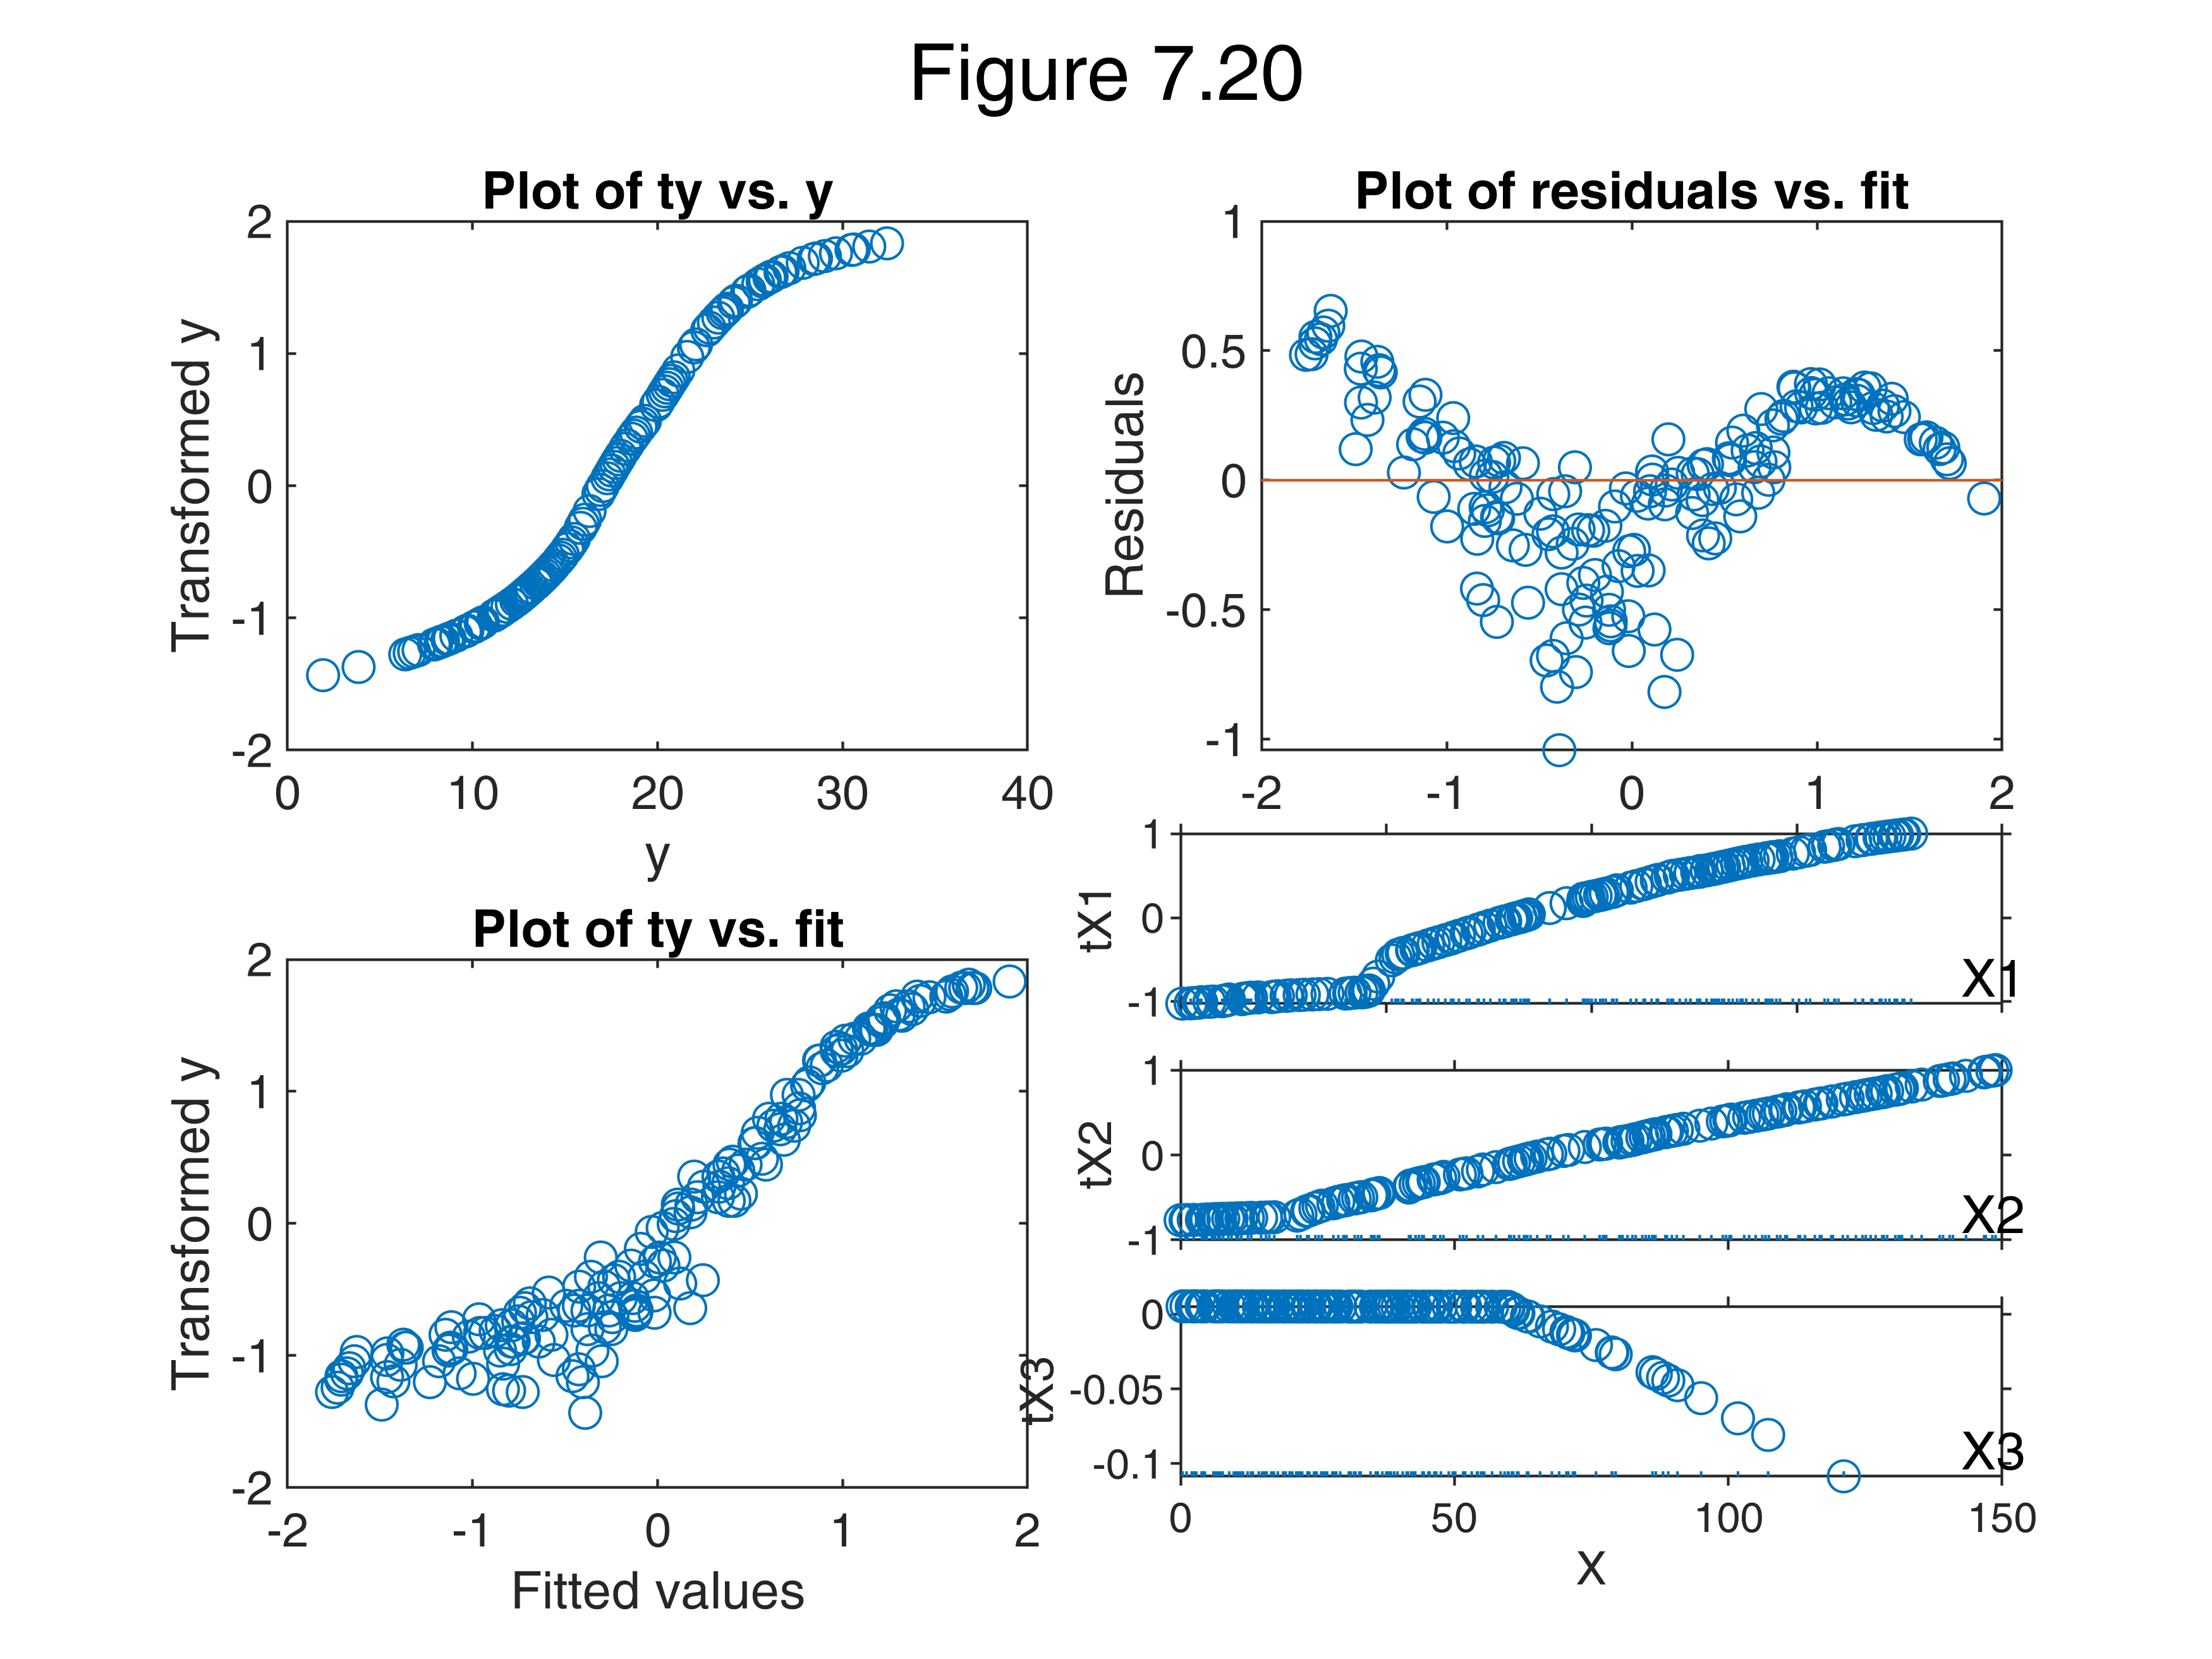

In [6]:
out=avas(y,X,'rob',false,'tyinitial',false,'orderR2',false,...
    'scail',false,'trapezoid',false','l',3*ones(size(X,2),1));
aceplot(out,'oneplot',true)

if prin==1
    % print to postscript
    print -depscMD1.eps;
else
    sgtitle('Figure 7.20')
    set(gcf,"Name",'Figure 7.20')
end

## Regression model based on transformed data using all options set to false

find F\-value


In [7]:
outTRAnoOPT=fitlm(out.tX,out.ty);
disp('ANOVA table based on AVAS transformed data')

ANOVA table based on AVAS transformed data

In [8]:
disp(outTRAnoOPT)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                    Estimate        SE         tStat         pValue  
                   __________    ________    __________    __________
    (Intercept)    2.6468e-17    0.025133    1.0531e-15             1
    x1                 1.0186    0.036924        27.586     4.363e-64
    x2                 1.0375    0.045368        22.868    2.5388e-53
    x3                 1.1056      1.6452       0.67203        0.5025
Number of observations: 171, Error degrees of freedom: 167
Root Mean Squared Error: 0.329
R-squared: 0.895,  Adjusted R-Squared: 0.893
F-statistic vs. constant model: 472, p-value = 2.69e-81

In [9]:

% F stat is 472 (even smaller than that for linear regression)

## Marketing data: all options set to true. Create Figure 7.21


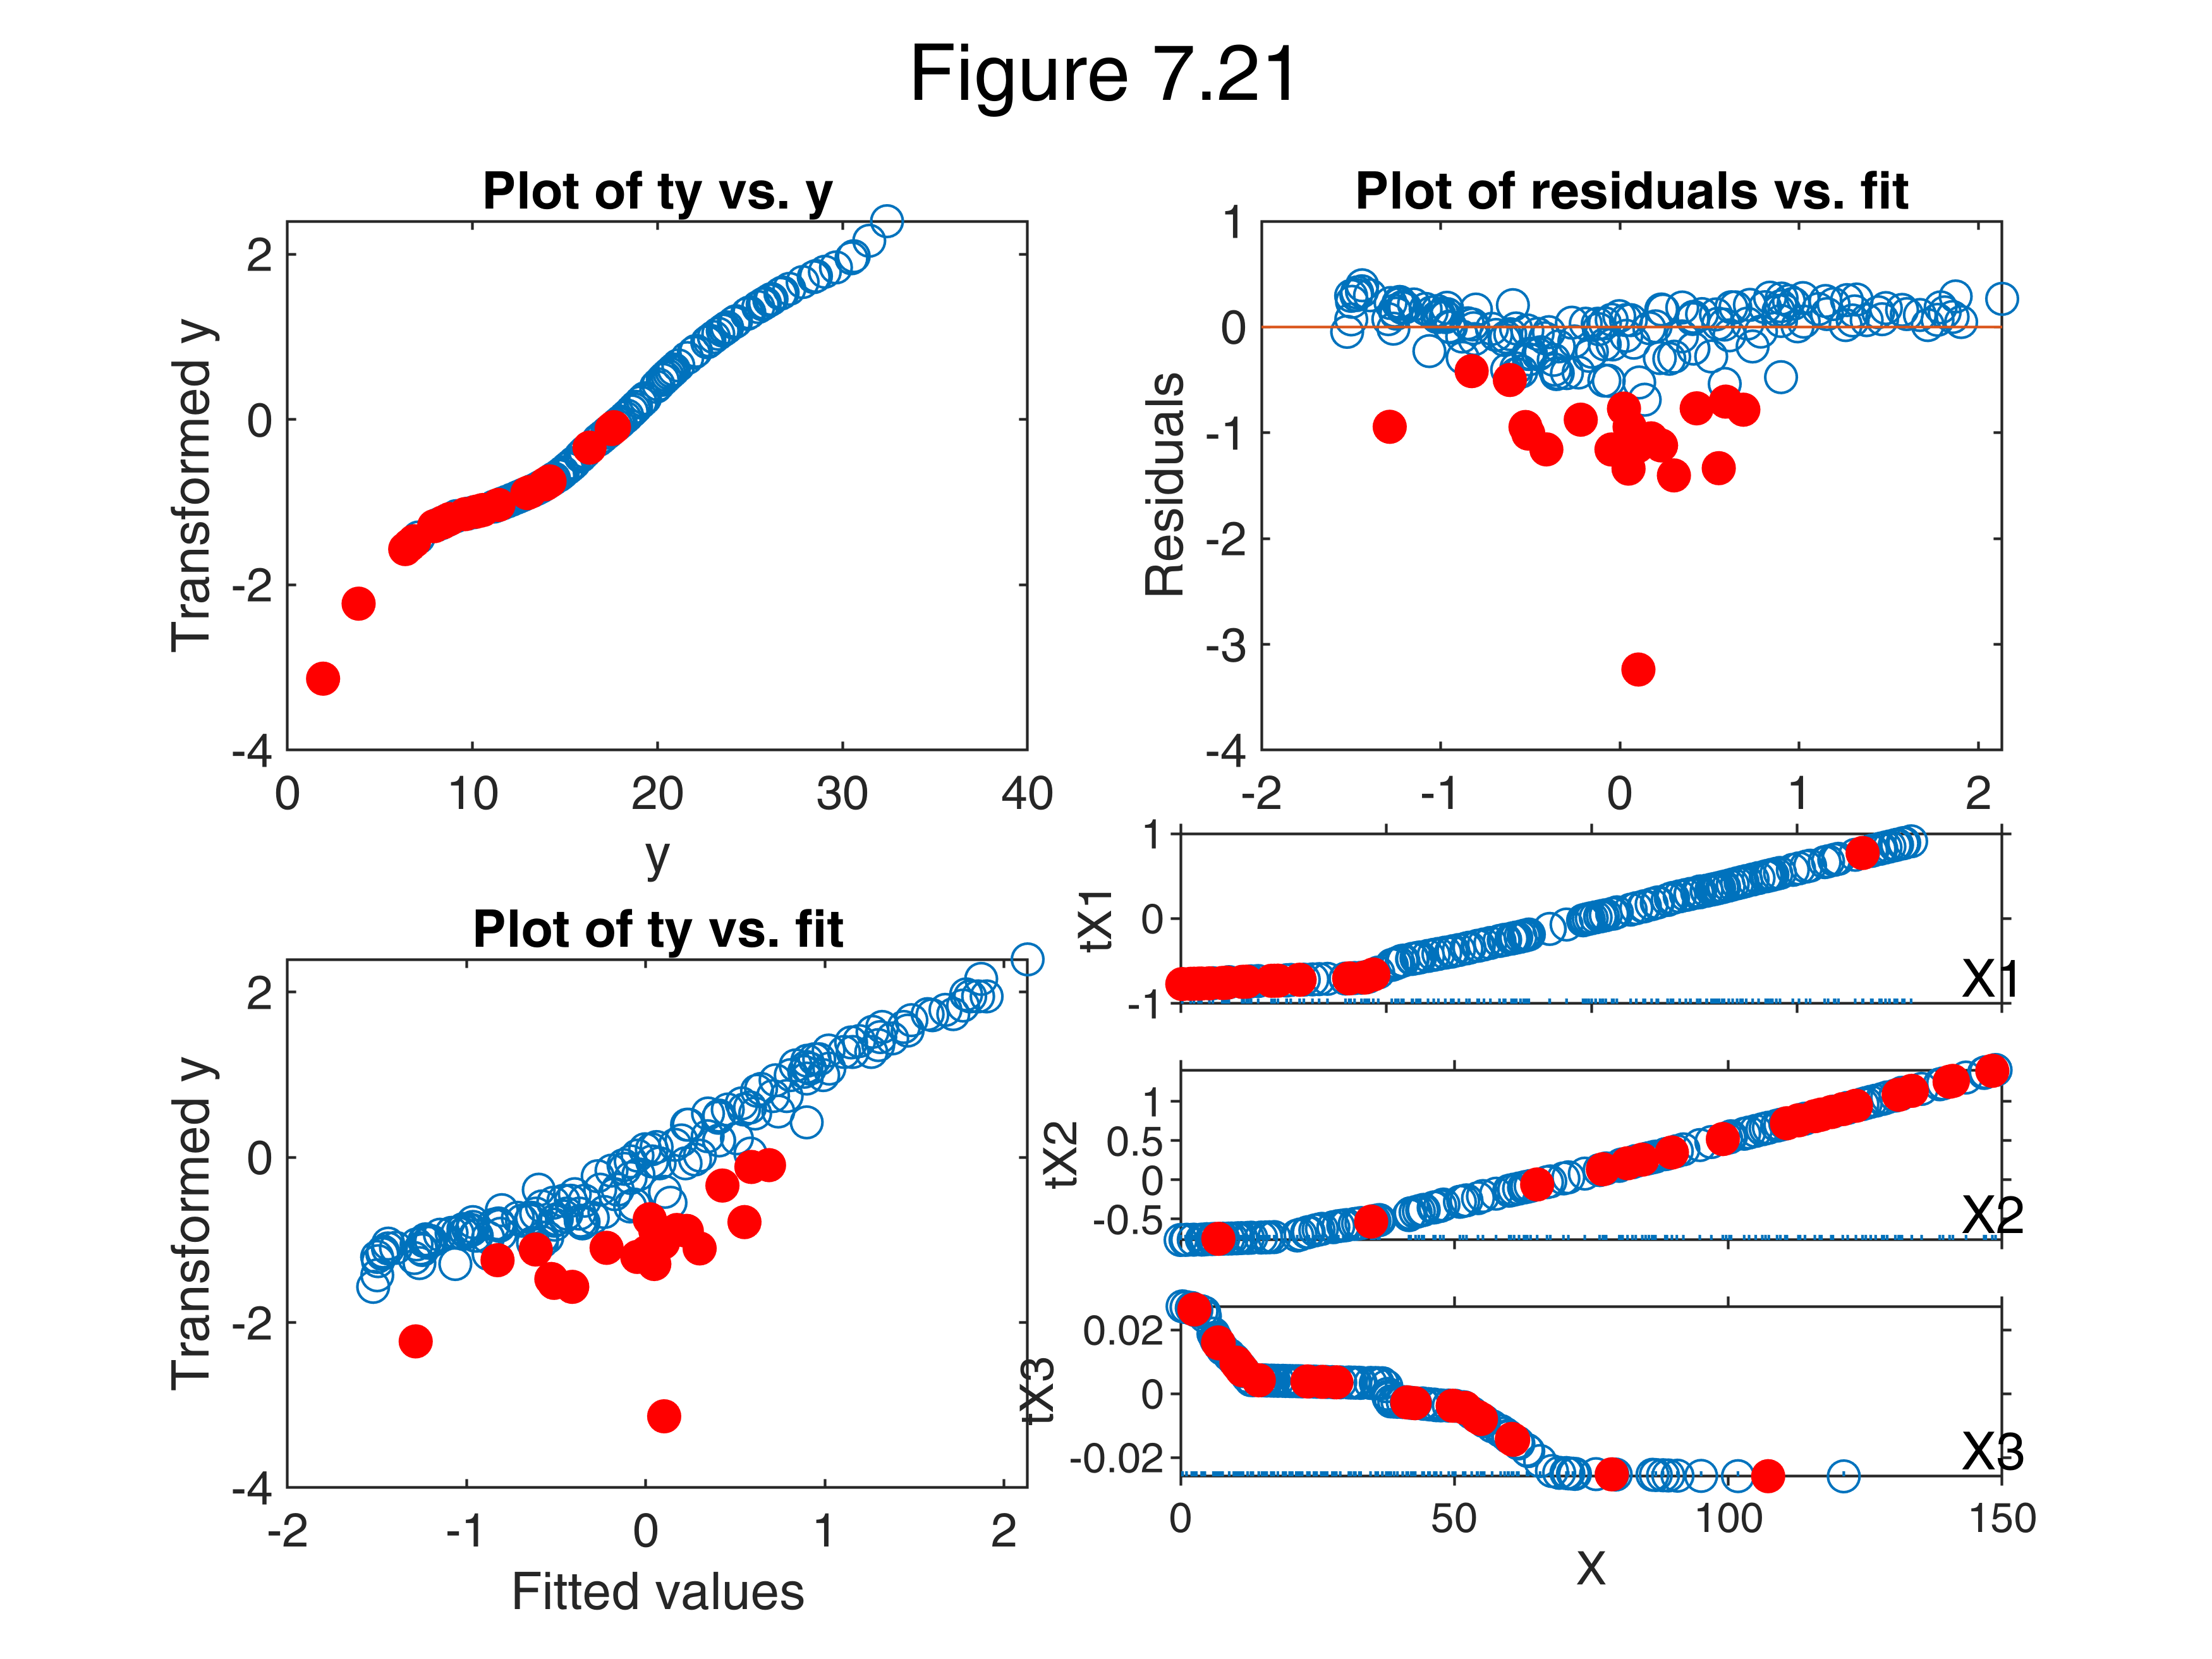

In [10]:
%tyinitial=struct;
% tyinitial.la=-1:0.5:1;
outTRAallOPT=avas(y,X,'trapezoid',true,'rob',true,'tyinitial',true,'orderR2',true,'scail',true,'l',3*ones(size(X,2),1));
aceplot(outTRAallOPT,'oneplot',true)

if prin==1
    % print to postscript
    print -depsc figs\MD2.eps;
else
    sgtitle('Figure 7.21')
    set(gcf,"Name",'Figure 7.21')
end

In [11]:
disp('Number of outliers found')

Number of outliers found

In [12]:
disp(length(outTRAallOPT.outliers))

    21

In [13]:
disp('p-value DW test (all options set to true)')

p-value DW test (all options set to true)

In [14]:
disp(outTRAallOPT.pvaldw)

1.3235e-09

In [15]:
disp('p-value Normality test (all options set to true)')

p-value Normality test (all options set to true)

In [16]:
disp(outTRAallOPT.pvaljb)

    0.0045

## Marketing data: regression model based on transformed data using all options set to true

find F value


In [17]:
outALLopts=fitlm(outTRAallOPT.tX,outTRAallOPT.ty,'Exclude',outTRAallOPT.outliers);
disp(outALLopts)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                    Estimate        SE         tStat         pValue  
                   __________    ________    __________    __________
    (Intercept)    2.3279e-16    0.018397    1.2654e-14             1
    x1                 0.9989    0.038255        26.112    7.0561e-57
    x2                 1.0378    0.029769        34.863    1.1476e-72
    x3                 1.7719      1.4698        1.2055       0.22997
Number of observations: 150, Error degrees of freedom: 146
Root Mean Squared Error: 0.225
R-squared: 0.951,  Adjusted R-Squared: 0.95
F-statistic vs. constant model: 936, p-value = 4.24e-95

In [18]:
% F stat excluding the outliers is 936

## Prepare input for Figure 7.22

model selection with quadratic model


In [19]:
Xq=[X(:,1:2) X(:,1).^2 X(:,2).^2 X(:,1).*X(:,2)];
[VALtfin,CorrMat]=avasms(y,Xq,'l',3*ones(size(Xq,2),1),...
    'critBestSol',0.03,'maxBestSol',4,'plots',0);

## Create Figure 7.22

In [20]:
BigAx=avasmsplot(VALtfin);
disp(VALtfin)

    rob    scail    tyinitial    orderR2    trapezoid      R2       pvalDW      pvalJB     nused                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            res                                                                                                                                                                                                                                                         


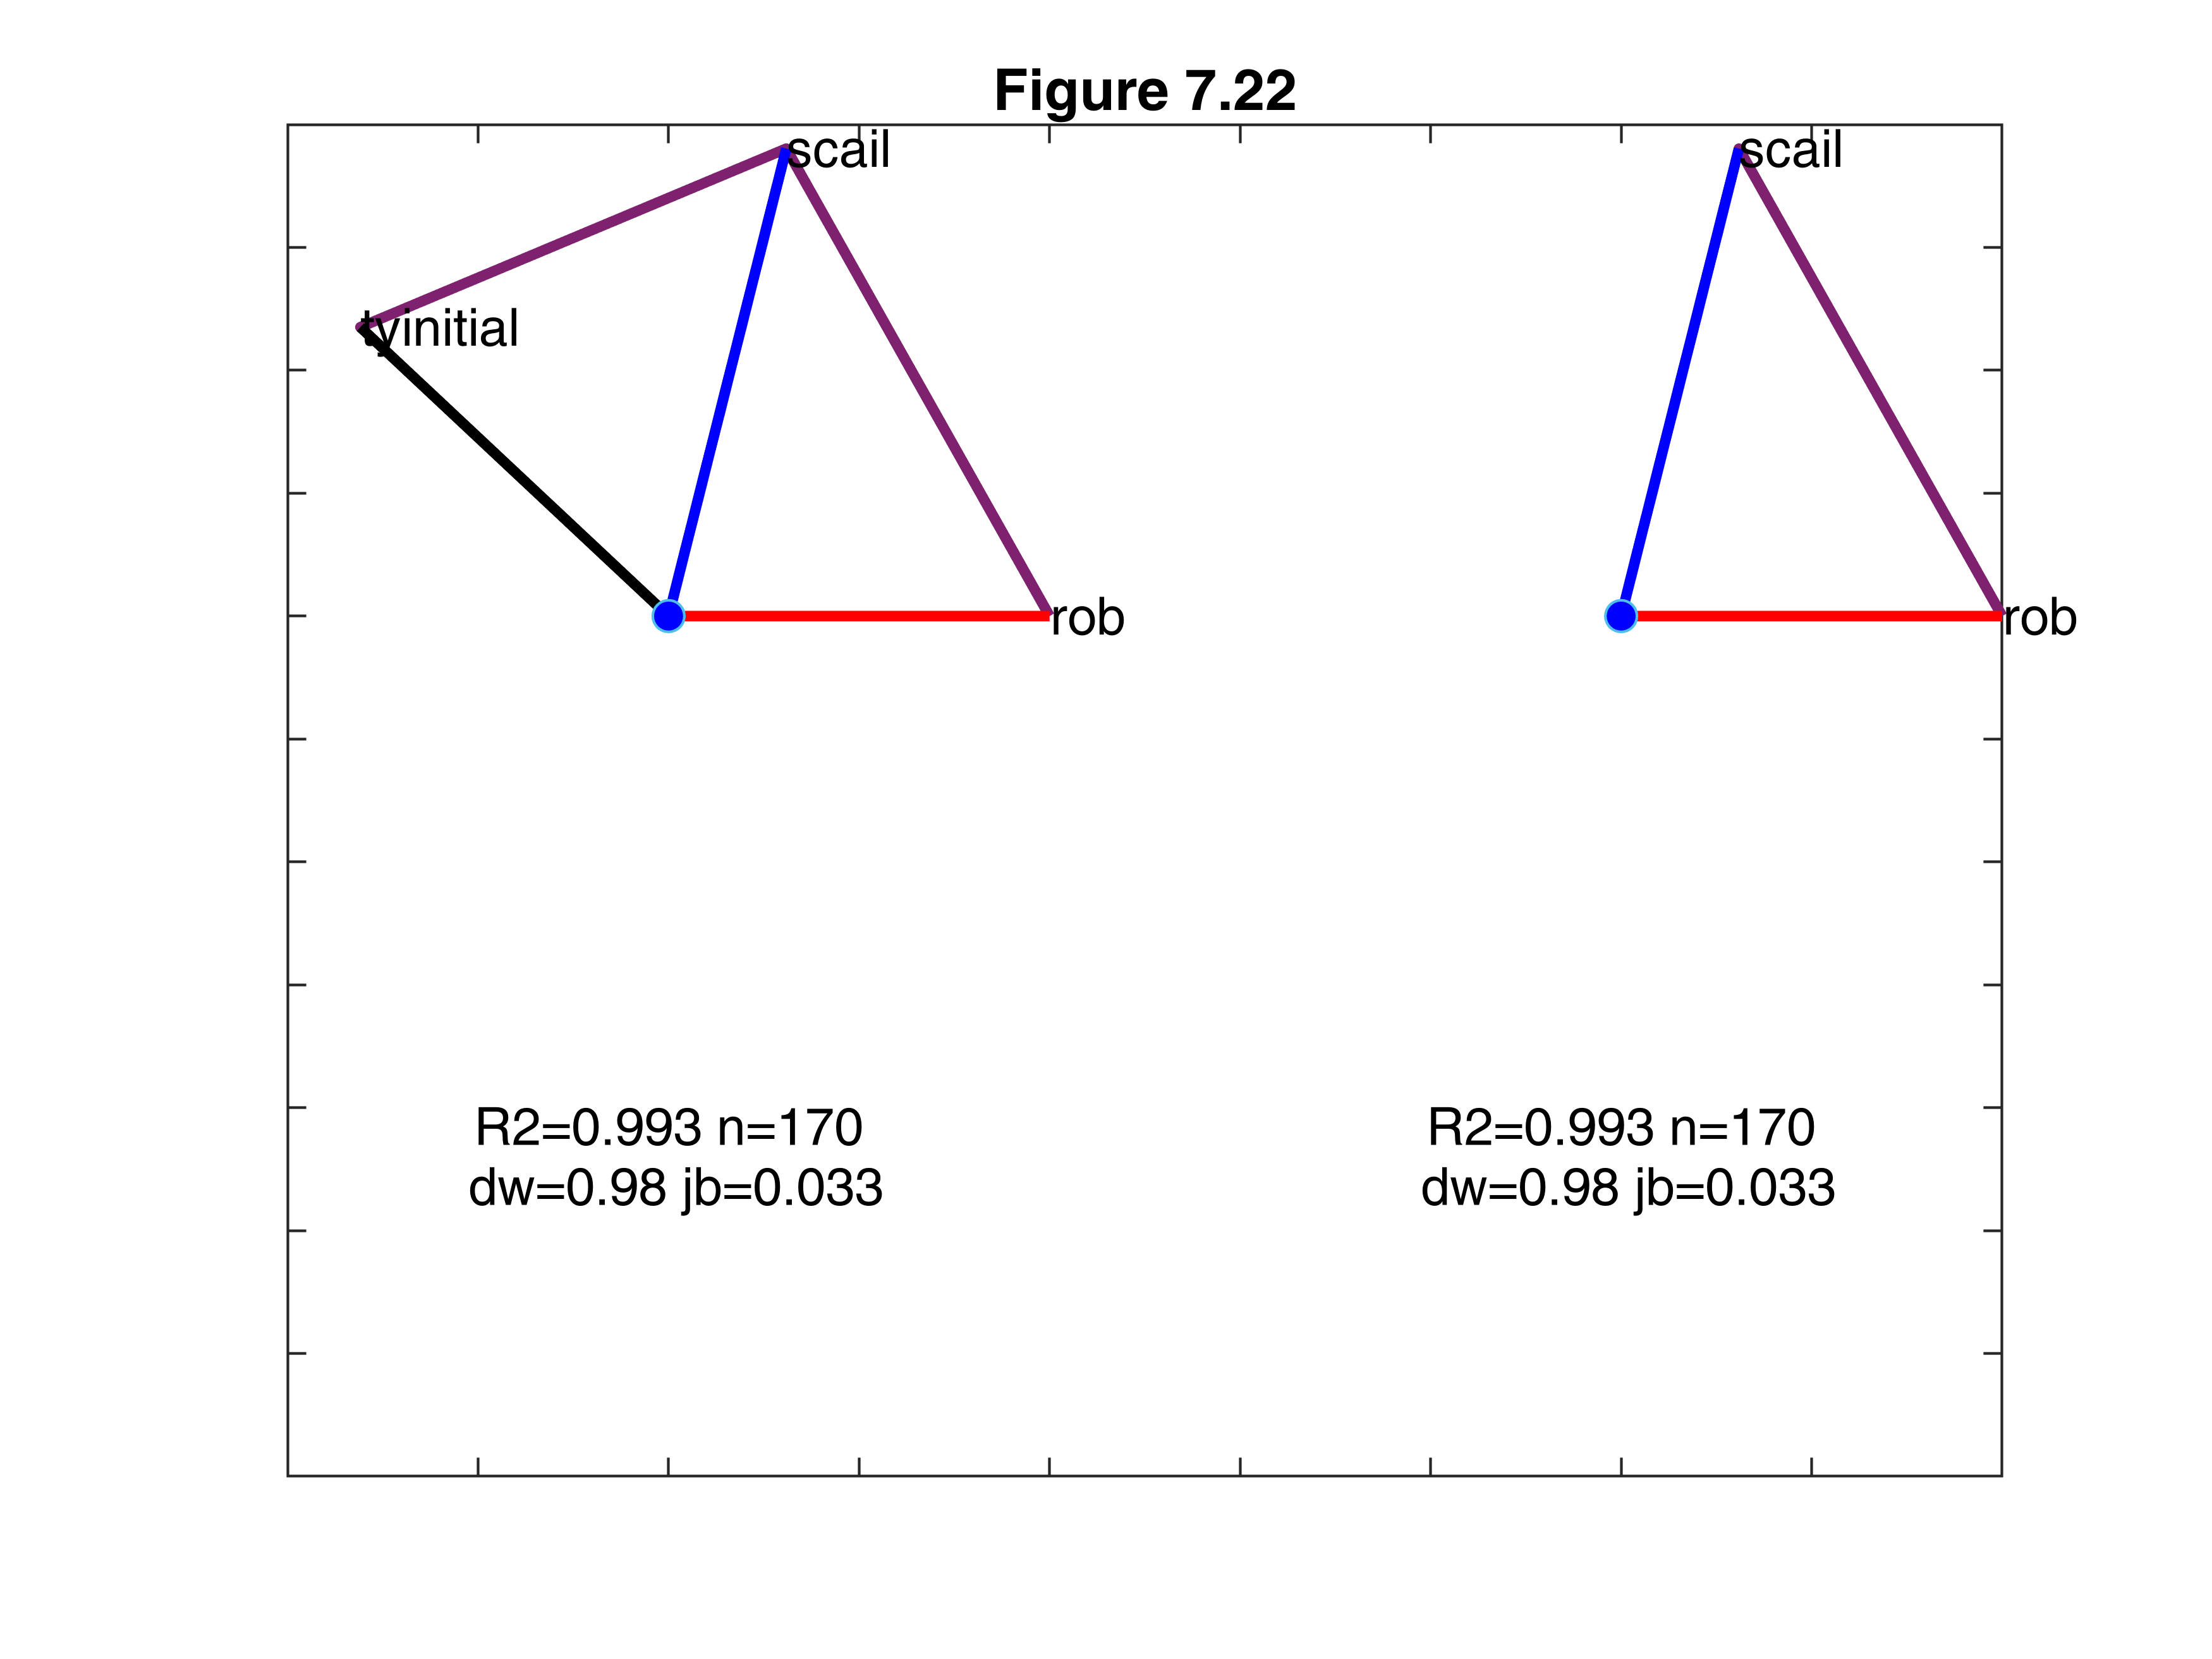

In [21]:

if prin==1
    % print to postscript
    print -depsc figs\MD3.eps;
else
    title(BigAx,'Figure 7.22')
    set(gcf,"Name",'Figure 7.22')
end

## Create Figure 7.23

Show details of best solution,



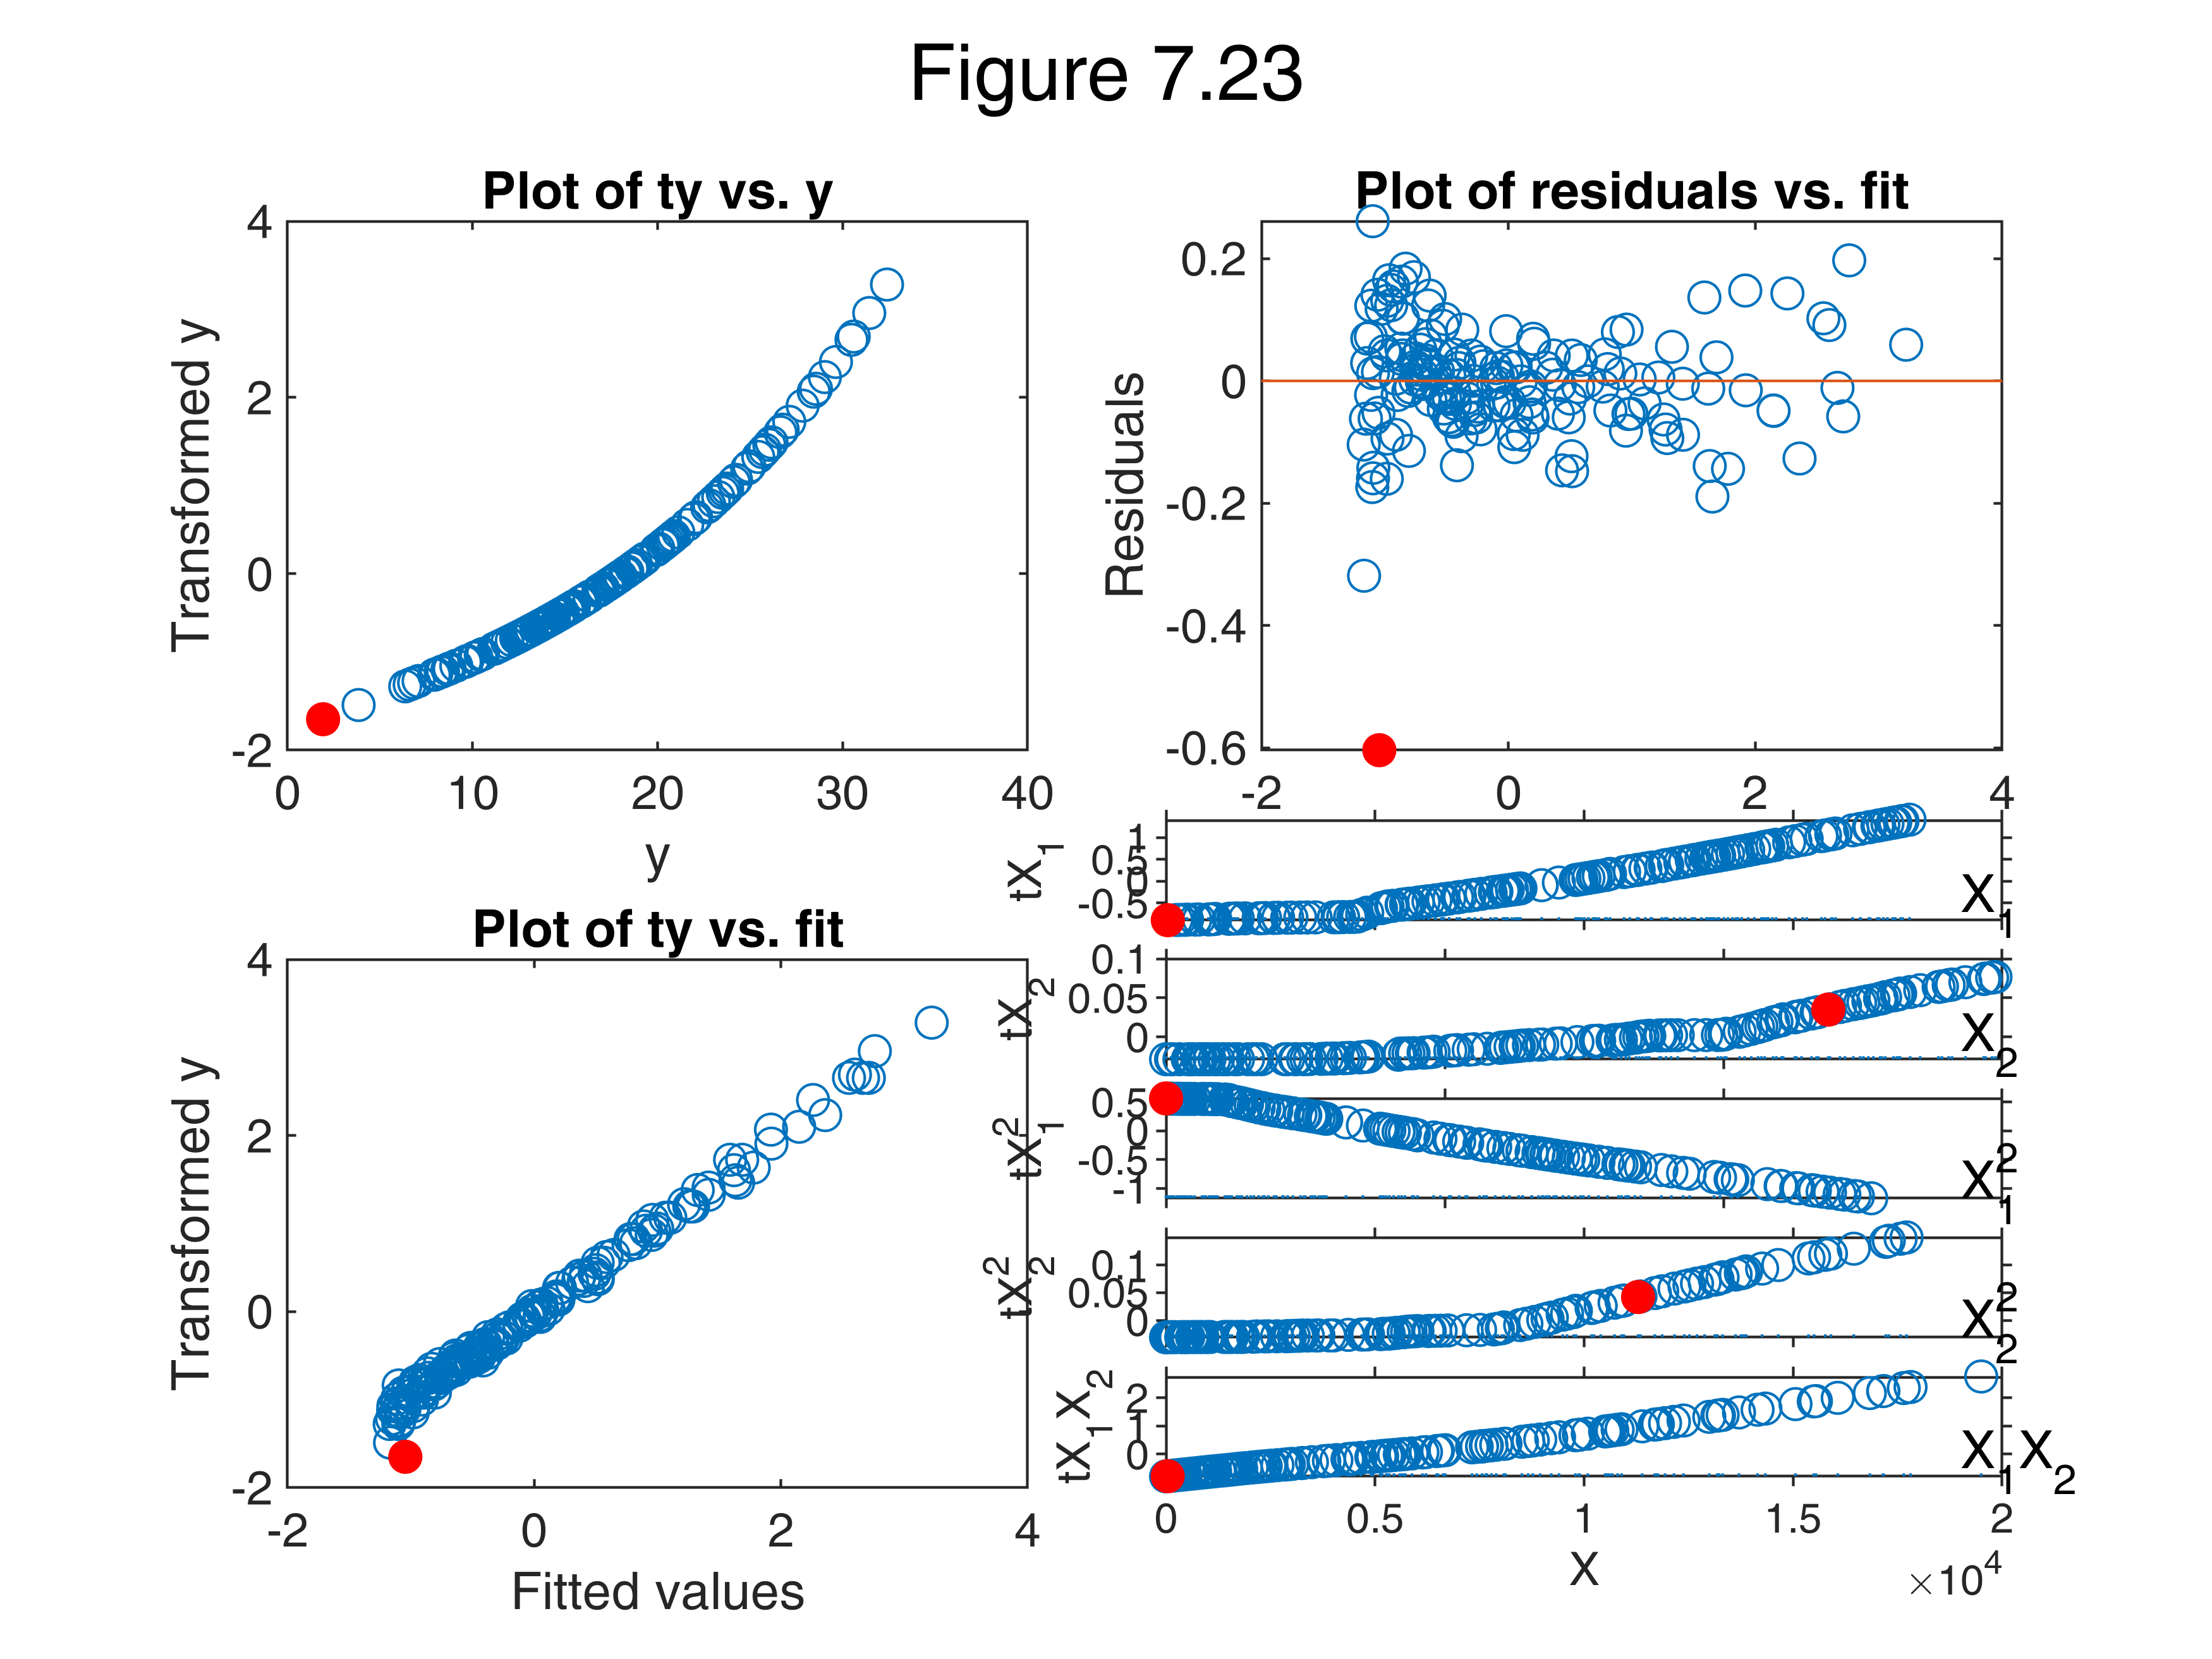

In [22]:
j=1;
outj=VALtfin{j,"Out"};
solj=outj{:};
VarNames={'X_1' 'X_2' 'X_1^2' 'X_2^2' 'X_1X_2' 'y'};
aceplot(solj,'oneplot',true,'VarNames',VarNames)
if prin==1
    % print to postscript
    print -depsc figs\MD4.eps;
else
    sgtitle('Figure 7.23')
    set(gcf,"Name",'Figure 7.23')
end

In [23]:

% Regression model on the transformed scale
outjr=fitlm(solj.tX,solj.ty,'Exclude',solj.outliers,'VarNames',VarNames);

disp('ANOVA based on the robust quadratic model')

ANOVA based on the robust quadratic model

In [24]:
disp(outjr)

Linear regression model:
    y ~ 1 + X_1 + X_2 + X_1^2 + X_2^2 + X_1X_2
Estimated Coefficients:
                    Estimate        SE           tStat         pValue   
                   __________    _________    ___________    ___________
    (Intercept)    -3.865e-16    0.0059696    -6.4745e-14              1
    X_1               0.85537     0.069845         12.247     6.6521e-25
    X_2               -2.3917      0.79578        -3.0054      0.0030689
    X_1^2             0.89772     0.091169         9.8467     2.9041e-18
    X_2^2              2.1162      0.43307         4.8864     2.4262e-06
    X_1X_2              1.083     0.017719         61.119    9.0516e-115
Number of observations: 170, Error degrees of freedom: 164
Root Mean Squared Error: 0.0778
R-squared: 0.994,  Adjusted R-Squared: 0.994
F-statistic vs. constant model: 5.58e+03, p-value = 4.22e-181

## Marketing data: quadratic model all options set to false

In [25]:
outTRAqNoOpt=avas(y,Xq,'l',3*ones(size(Xq,2),1));
disp('ANOVA based non robust quadratic model')

ANOVA based non robust quadratic model

In [26]:
fitlm(outTRAqNoOpt.tX,outTRAqNoOpt.ty,'Exclude','')

ans = 
Linear regression model:
    y ~ 1 + x1 + x2 + x3 + x4 + x5
Estimated Coefficients:
                    Estimate        SE         tStat         pValue  
                   __________    ________    __________    __________
    (Intercept)    8.6237e-16     0.01842    4.6817e-14             1
    x1                0.63791    0.065322        9.7656    4.5998e-18
    x2                0.66457    0.045898        14.479    3.4272e-31
    x3                0.64007    0.065569        9.7617    4.7157e-18
    x4                0.71574    0.053843        13.293    7.0636e-28
    x5                0.73682    0.031912         23.09    1.4728e-53
Number of observations: 171, Error degrees of freedom: 165
Root Mean Squared Error: 0.241
R-squared: 0.944,  Adjusted R-Squared: 0.942
F-statistic vs. constant model: 556, p-value = 2.75e-101

In [27]:
% The F-stat now has a value of 556, hardly better than regression on the
% first-order model without transformation of the response or of the
% explanatory variables

## Create Figure 7.24

Quadratic model standand non robust analysis



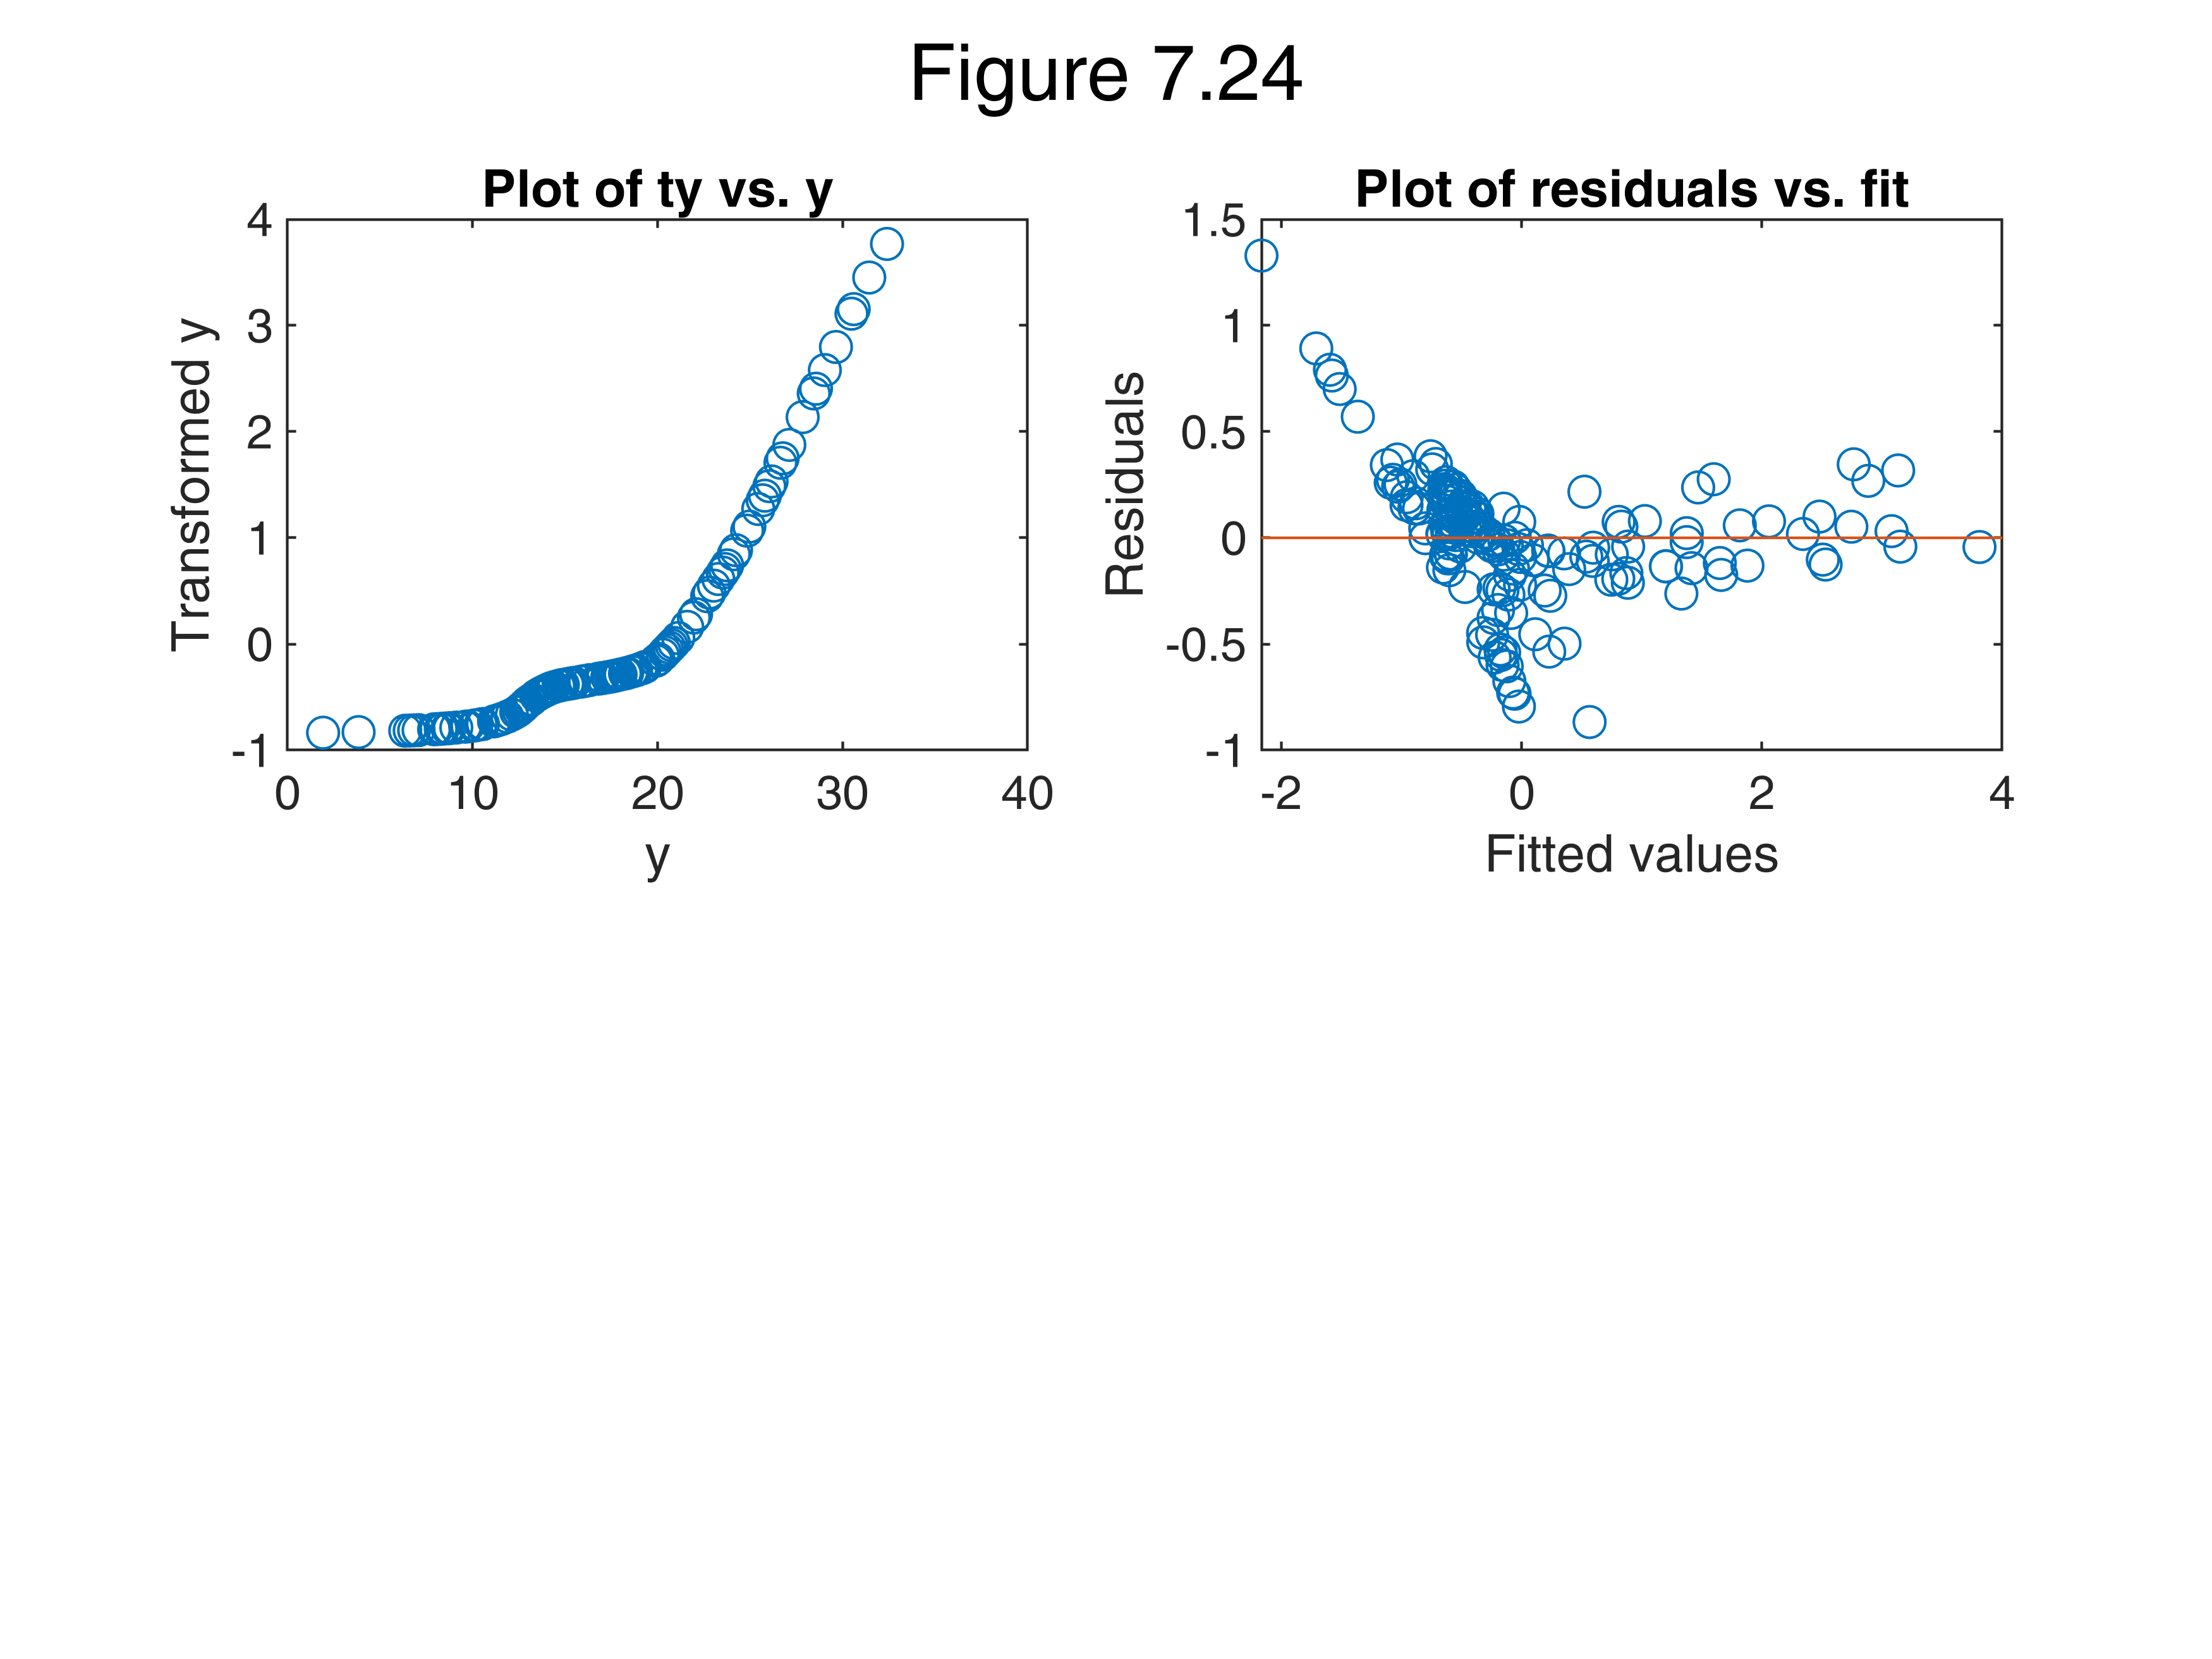

In [28]:
aceplot(outTRAqNoOpt,'oneplot','','tyFitted',false)
if prin==1
    % print to postscript
    print -depsc figs\MD5.eps;
else
    sgtitle('Figure 7.24')
    set(gcf,"Name",'Figure 7.24')
end

In [29]:

%InsideREADME